In [1]:
!apt-get -qq install -y libgfortran4 gawk
!pip install -q pypka biopython

Selecting previously unselected package libsigsegv2:amd64.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libsigsegv2_2.12-1_amd64.deb ...
Unpacking libsigsegv2:amd64 (2.12-1) ...
Setting up libsigsegv2:amd64 (2.12-1) ...
Selecting previously unselected package gawk.
(Reading database ... 144440 files and directories currently installed.)
Preparing to unpack .../gawk_1%3a4.1.4+dfsg-1build1_amd64.deb ...
Unpacking gawk (1:4.1.4+dfsg-1build1) ...
Setting up gawk (1:4.1.4+dfsg-1build1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 4.9MB 2.8MB/s 
     |████████████████████████████████| 2.3MB 36.2MB/s 


In [0]:
from pypka.pypka import Titration
import Bio
from Bio.PDB import PDBList
import os

In [3]:
pdbl = PDBList()
pdbl.retrieve_pdb_file('4lzt', file_format="pdb", pdir='.')
os.rename('pdb4lzt.ent', '4lzt.pdb')

In [0]:
params = {
    'structure'     : '4lzt.pdb',    
    'pH'            : "0,14",
    'ncpus'         : 1,
    'epsin'         : 15,
    'ionicstr'      : 0.1,
    'pbc_dimensions': 0,
    'convergence'   : 0.1
}
sites = {
    'A': ['1N', '1', '7', '129C']
}

In [9]:
tit = Titration(params, sites=sites)  

Start Preprocessing
Start PB Calculations
PB Runs Ended                                                                                

MC Runs Ended                                                                                

Results
Chain  Site   Name      pK
   A   2001    NTR    7.0
   A      1    LYS    10.45
   A      7    GLU    3.59
   A   2129    CTR    2.6
API exited successfully


In [26]:
pH = 7.0
for site in tit:
    pK = round(site.pK, 1)
    state = site.getProtState(pH)[0]    
    print(f'{site.res_name} {site.res_number:10} {pK:5.1f} {state}')

NTR       2001   7.0 undefined
LYS          1  10.5 protonated
GLU          7   3.6 deprotonated
CTR       2129   2.6 deprotonated


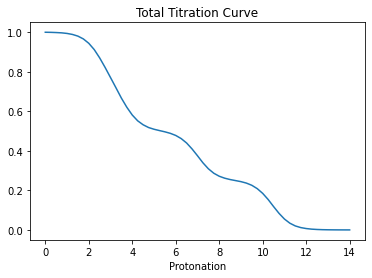

In [33]:
import matplotlib.pyplot as plt
tit_curve = tit.getTitrationCurve()
x = sorted(list(tit_curve.keys()))
y = [tit_curve[pH] for pH in x]
plt.title('Total Titration Curve')
plt.xlabel('pH')
plt.xlabel('Protonation')
plt.plot(x, y)
plt.show()